In [1]:
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np
import pandas as pd
import pathlib

import ambulance_game as abg
from main import (
    get_index_of_values,
    get_matrices,
    get_poa_values_for_given_strategies,
    run_replicator_dynamics_with_penalty,
    plot_asymmetric_replicator_dynamics_with_penalty,
    run_replicator_dynamics_with_dual_parameters,
    get_poa_values_for_given_strategies_dual_parameters,
    plot_asymmetric_replicator_dynamics_with_dual_parameters,
    build_performance_values_array,
    find_worst_nash_equilibrium_measure,
    get_performance_measure_for_given_strategies,
)

In [2]:
df = pd.read_csv(pathlib.Path("../data/_parameters/main.csv"))

# Parameters

Decreased the values of all arrival rates from the previous analysis. This makes less individuals getting lost to the system.

$$
    \lambda_{1_1} = 4.5 \quad \rightarrow \quad \lambda_{1_1} = 2.5 \\
    \lambda_{1_2} = 6 \quad \rightarrow \quad \lambda_{1_2} = 3 \\
    \lambda_2 = 10 \quad \rightarrow \quad \lambda_2 = 6
$$

In [67]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4, 
        "lambda_1_1": 2.5,          # 4.5
        "lambda_1_2": 3,            # 6
        "lambda_2": 6,              # 10
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

In [68]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

In [69]:
xs, ys = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))

In [70]:
performance_values_array_A, performance_values_array_B = build_performance_values_array(
    routing=R,
    parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

In [71]:
minimum_value_A = np.min(performance_values_array_A)
minimum_value_B = np.min(performance_values_array_B)

poa_span = np.linspace(1, 99, 20, dtype=int)

performace_measure_poa_list_A = [
    find_worst_nash_equilibrium_measure(
        all_nash_equilibrias=(tuple((xs[i], ys[i])),),
        performance_values_array=performance_values_array_A,
    )[0]
    / minimum_value_A
    for i in poa_span
]
performace_measure_poa_list_B = [
    find_worst_nash_equilibrium_measure(
        all_nash_equilibrias=(tuple((xs[i], ys[i])),),
        performance_values_array=performance_values_array_B,
    )[0]
    / minimum_value_B
    for i in poa_span
]

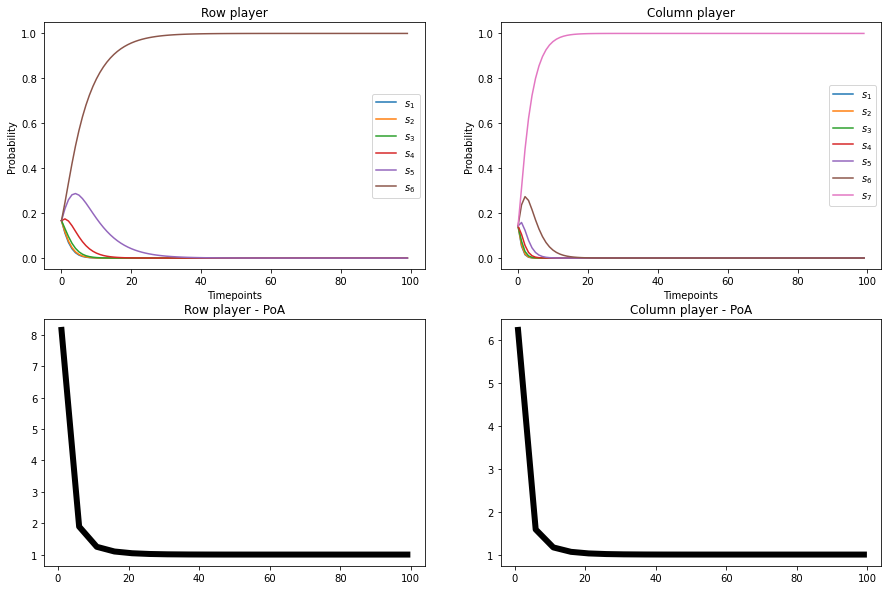

In [72]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(xs)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Row player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(xs[0]))])

plt.subplot(2, 2, 2)
plt.plot(ys)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Column player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(ys[0]))])

plt.subplot(2, 2, 3)
plt.title("Row player - PoA")
plt.plot(poa_span, performace_measure_poa_list_A, color="black", linewidth=6)
plt.ylim(top=None, bottom=None)

plt.subplot(2, 2, 4)
plt.title("Column player - PoA")
plt.plot(poa_span, performace_measure_poa_list_B, color="black", linewidth=6)
plt.ylim(top=None, bottom=None);

In [76]:
print("Blocking time - row player : ", performace_measure_poa_list_A[-1] * minimum_value_A)
print("Blocking time - column player : ", performace_measure_poa_list_B[-1] * minimum_value_B)

Blocking time - row player :  0.07682468394497784
Blocking time - column player :  0.05997078789207671


# Increasing artificial values

$$
    N_1 = 6 \quad \rightarrow \quad N_1 = 12 \\
    N_2 = 7 \quad \rightarrow \quad N_2 = 14 \\
    M_1 = 5 \quad \rightarrow \quad M_1 = 10 \\
    M_2 = 4 \quad \rightarrow \quad M_2 = 8    
$$

In [79]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}

In [80]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

In [81]:
xs, ys = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))

In [82]:
performance_values_array_A, performance_values_array_B = build_performance_values_array(
    routing=R,
    parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

In [83]:
minimum_value_A = np.min(performance_values_array_A)
minimum_value_B = np.min(performance_values_array_B)

poa_span = np.linspace(1, 99, 20, dtype=int)

performace_measure_poa_list_A = [
    find_worst_nash_equilibrium_measure(
        all_nash_equilibrias=(tuple((xs[i], ys[i])),),
        performance_values_array=performance_values_array_A,
    )[0]
    / minimum_value_A
    for i in poa_span
]
performace_measure_poa_list_B = [
    find_worst_nash_equilibrium_measure(
        all_nash_equilibrias=(tuple((xs[i], ys[i])),),
        performance_values_array=performance_values_array_B,
    )[0]
    / minimum_value_B
    for i in poa_span
]

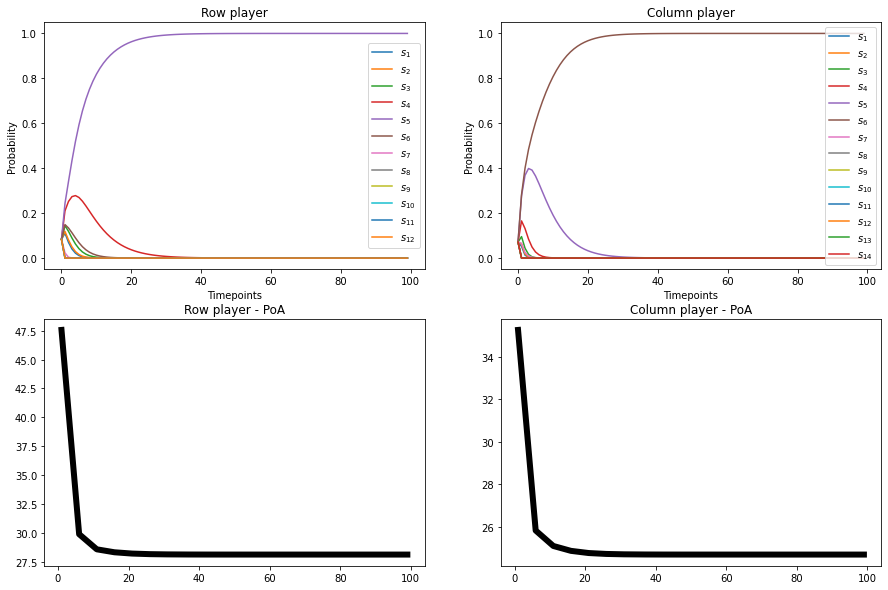

In [84]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(xs)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Row player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(xs[0]))])

plt.subplot(2, 2, 2)
plt.plot(ys)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Column player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(ys[0]))])

plt.subplot(2, 2, 3)
plt.title("Row player - PoA")
plt.plot(poa_span, performace_measure_poa_list_A, color="black", linewidth=6)
plt.ylim(top=None, bottom=None)

plt.subplot(2, 2, 4)
plt.title("Column player - PoA")
plt.plot(poa_span, performace_measure_poa_list_B, color="black", linewidth=6)
plt.ylim(top=None, bottom=None);

In [96]:
print("Blocking time - row player : ", performace_measure_poa_list_A[-1] * minimum_value_A)
print("Blocking time - column player : ", performace_measure_poa_list_B[-1] * minimum_value_B)

Blocking time - row player :  1.0423181681101048
Blocking time - column player :  0.8917108158747252


In [98]:
print("Minimum blocking time - row player : ", minimum_value_A)
print("Minimum blocking time - column player : ", minimum_value_B)

Minimum blocking time - row player :  0.03705641088168101
Minimum blocking time - column player :  0.03609122431936085


# Increasing artificial values even more

$$
    N_1 = 12 \quad \rightarrow \quad N_1 = 18 \\
    N_2 = 14 \quad \rightarrow \quad N_2 = 21 \\
    M_1 = 10 \quad \rightarrow \quad M_1 = 15 \\
    M_2 = 8 \quad \rightarrow \quad M_2 = 12 
$$

In [99]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 15,
    "buffer_capacity_2": 12, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 18,
    "system_capacity_2": 21,
    "target": 2,
}

In [100]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

In [101]:
xs, ys = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))

In [107]:
blocking_1, blocking_2 = get_performance_measure_for_given_strategies(
    strategy_A=np.argmax(xs[-1]), 
    strategy_B=np.argmax(ys[-1]), 
    routing=R, 
    parameters=problem_parameters, 
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities
)
min_block_1, min_block_2 = get_performance_measure_for_given_strategies(
    strategy_A=problem_parameters["system_capacity_1"] - 1, 
    strategy_B=problem_parameters["system_capacity_2"] - 1, 
    routing=R, 
    parameters=problem_parameters, 
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities
)

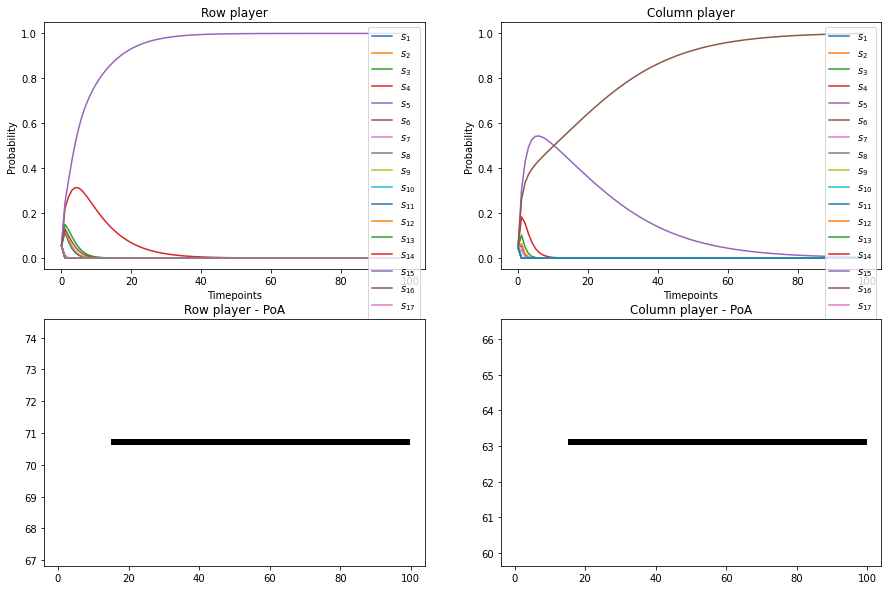

In [129]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(xs)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Row player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(xs[0]))])

plt.subplot(2, 2, 2)
plt.plot(ys)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Column player")
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(ys[0]))])

plt.subplot(2, 2, 3)
poa_row_lazy= [blocking_1 / min_block_1 if i != 1 and i != 2 else None for i in range(len(poa_span))]
plt.title("Row player - PoA")
plt.plot(poa_span, poa_row_lazy, color="black", linewidth=6)
plt.ylim(top=None, bottom=None)

plt.subplot(2, 2, 4)
poa_col_lazy = [blocking_2 / min_block_2 if i != 1 and i != 2 else None for i in range(len(poa_span))]
plt.title("Column player - PoA")
plt.plot(poa_span, poa_col_lazy, color="black", linewidth=6)
plt.ylim(top=None, bottom=None);

# Flooding the system (increasling $\lambda_2$)

In [278]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}
problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["lambda_2"] = 15

In [279]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)
A1 += 1
B1 += 1

In [280]:
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)
A2 += 1
B2 += 1

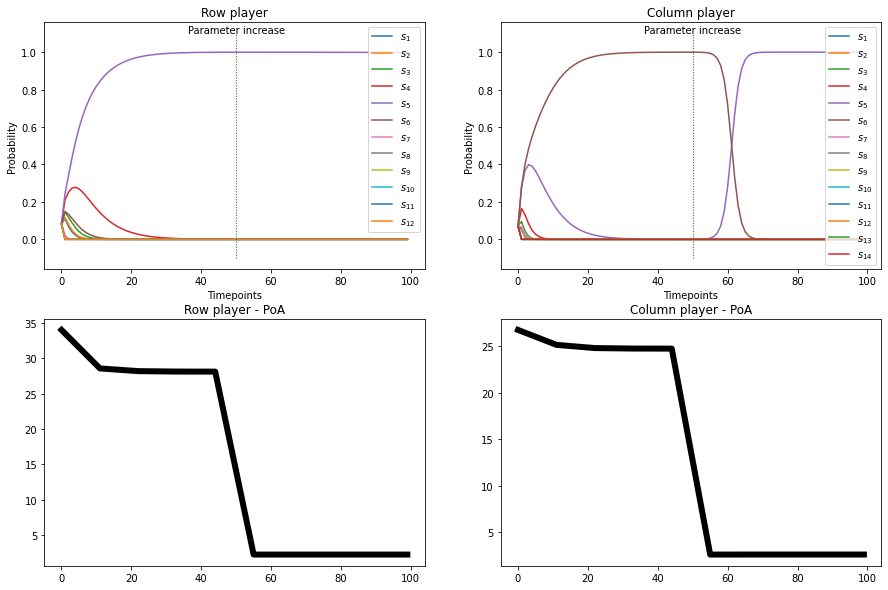

In [281]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    x_init=None,
    y_init=None,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

# Increasing number of servers $C_1$ and $C_2$

In [282]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}
problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["num_of_servers_1"] = 4
problem_parameters_2["num_of_servers_2"] = 3

In [283]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)

In [284]:
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)

In [285]:
A1 += 1
A2 += 1
B1 += 1
B2 += 1

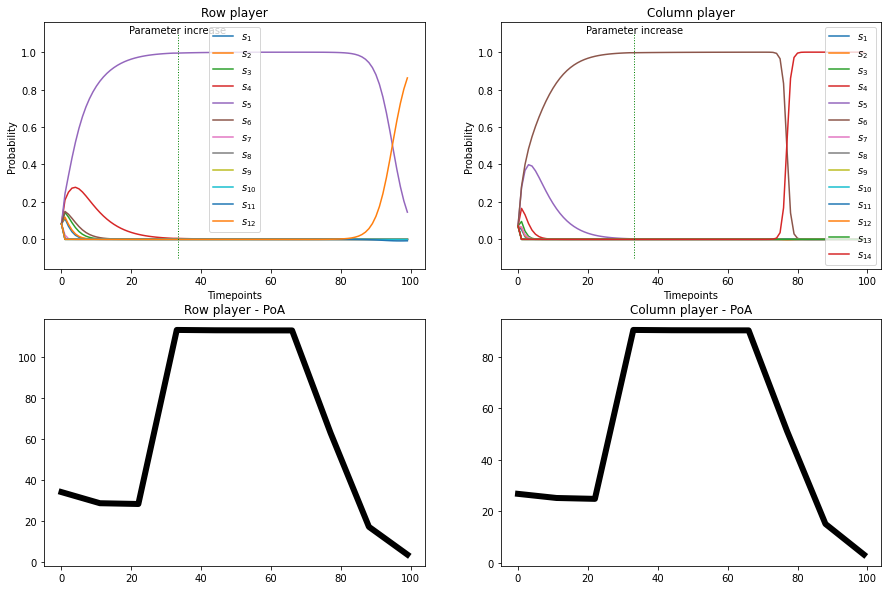

In [286]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    divide=3,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

# Penalise strategies

$$
    A = 
    \begin{pmatrix}
        x & x & x & x \\
        x & x & x & x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    B = 
    \begin{pmatrix}
        y & y & y & y \\
        y & y & y & y \\
        y & y & y & y \\    
    \end{pmatrix}
$$

$$
    \tilde{A} = 
    \begin{pmatrix}
        x & x & x & x \\
        \rho x & \rho x & \rho x & \rho x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    \tilde{B} = 
    \begin{pmatrix}
        y & \rho y & y & y \\
        y & \rho y & y & y \\
        y & \rho y & y & y \\    
    \end{pmatrix}
$$

In [287]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}

In [288]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

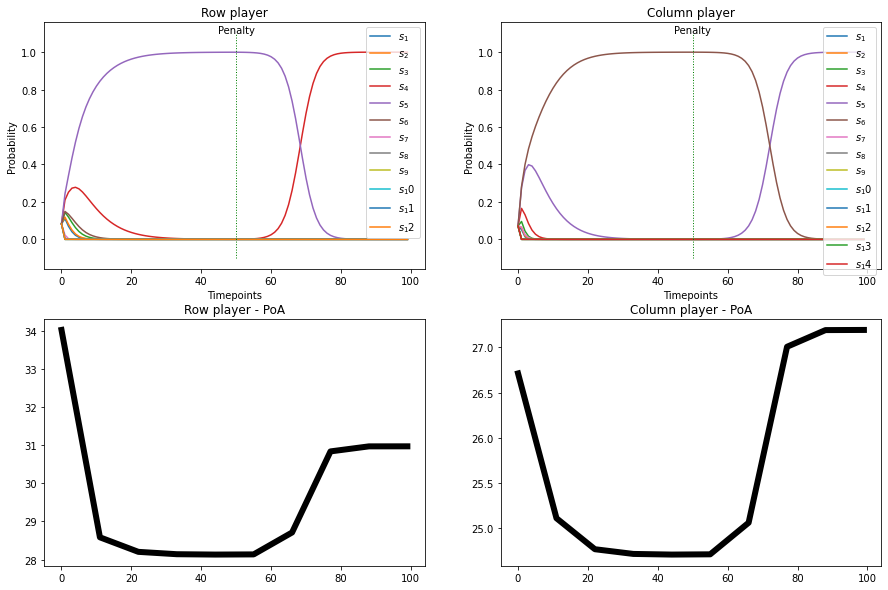

In [289]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R,
    A=A,
    B=B,
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=0.9994,
    poa_plot_min=None, 
    poa_plot_max=None,
)

# Penalise strategies in a different way

In [106]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}

In [113]:
penalty = 0.9983     # 0.999 # 0.9983

# Row Player
start_1 = 1     # 4
stop_1 = 5

# Column Player
start_2 = 1     # 4
stop_2 = 6

In [114]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

xs1, ys1 = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100))
A[(start_1 - 1):stop_1, :] *= penalty
B[:, (start_2 - 1):stop_2] *= penalty
xs2, ys2 = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100), x0=xs1[-1], y0=ys1[-1])
xs = np.concatenate((xs1, xs2))
ys = np.concatenate((ys1, ys2))

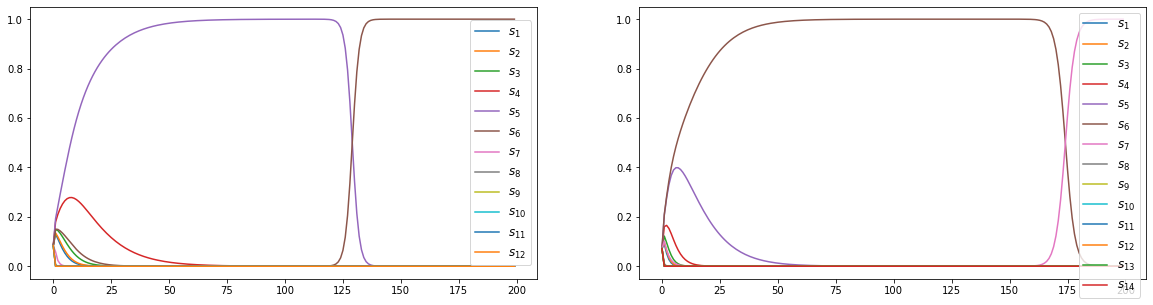

In [115]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(xs)
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(xs[-1]))], fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(ys)
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(ys[-1]))], fontsize=12);

# Appendix

In [252]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 10,
    "buffer_capacity_2": 8, 
    "lambda_1_1": 2.5,
    "lambda_1_2": 3,
    "lambda_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 12,
    "system_capacity_2": 14,
    "target": 2,
}

In [275]:
penalty = 0.9995

In [276]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

xs1, ys1 = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100))
A[4, :] *= penalty
B[:, 5] *= penalty
xs2, ys2 = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100), x0=xs1[-1], y0=ys1[-1])
xs = np.concatenate((xs1, xs2))
ys = np.concatenate((ys1, ys2))

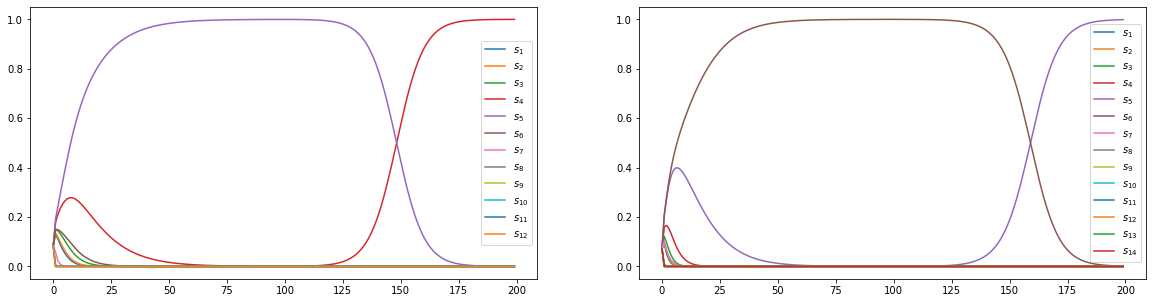

In [277]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(xs)
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(xs[-1]))]);

plt.subplot(1, 2, 2)
plt.plot(ys)
plt.legend([f"$s_{{{i + 1}}}$" for i in range(len(ys[-1]))]);